In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import random
from IPython.display import display_html

In [76]:
pd.set_option('display.max_colwidth', None)

In [77]:
data: pd.DataFrame = pd.read_csv('train.csv')
    
data.shape

(550068, 12)

In [78]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [80]:
data.duplicated().sum() 

0

In [81]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [82]:
data.isna().sum() #encoded as na

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [83]:
#data = data.fillna(method = 'bfill')
data = data.dropna()

In [84]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [85]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,8.178886,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1.732907e+03,6.487522,0.490470,2.573969,4.500288,4.125338,5082.287959
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,1.003101e+06,7.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,1.004480e+06,14.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,1.006040e+06,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


## Describing the target variable 'Purchase'

In [86]:
purchase_describe = data['Purchase'].describe()
display(purchase_describe)

count    166821.000000
mean      11658.114980
std        5082.287959
min         185.000000
25%        7869.000000
50%       11756.000000
75%       15626.000000
max       23959.000000
Name: Purchase, dtype: float64

In [87]:
purchase_describe = data['Purchase'].describe()
purchase_describe.loc['sum'] = data['Purchase'].sum()
purchase_describe.loc['mean_by_user'] = data['Purchase'].sum() / data['User_ID'].nunique() #checking mean purchase amount by each user
purchase_describe.drop(['count', 'std'], inplace=True)
display(pd.DataFrame(purchase_describe).T)

,mean,min,25%,50%,75%,max,sum,mean_by_user
Purchase,11658.11498,185.0,7869.0,11756.0,15626.0,23959.0,1.944818e+09,331314.889097


## Purchase boxplot

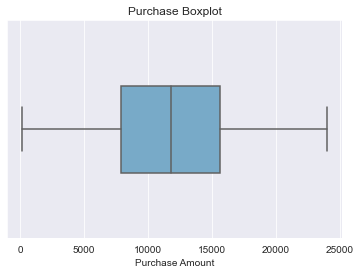

In [88]:
sns.boxplot(x='Purchase', 
                 data=data, 
                 width=0.4,
                 palette="Blues")
plt.title("Purchase Boxplot")
plt.suptitle("")
plt.xlabel("Purchase Amount")
plt.show()

## Describing product_ID, gender, age, occupation, city_category, marital status, product_category_1

In [89]:
columns_describe = data[['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1']].astype('object').describe()
columns_describe.loc['percent'] = 100*columns_describe.loc['freq'] / columns_describe.loc['count']
display(columns_describe)

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1
count,166821,166821,166821,166821.000000,166821,166821.000000,166821.000000
unique,528,2,7,21.000000,3,2.000000,12.000000
top,P00025442,M,26-35,4.000000,B,0.000000,1.000000
freq,1615,129227,66942,22364.000000,69243,99619.000000,91142.000000
percent,0.968104,77.464468,40.128041,13.405986,41.507364,59.716103,54.634608


## Plotting number of transactions by age groups and mean purchase amount by age groups

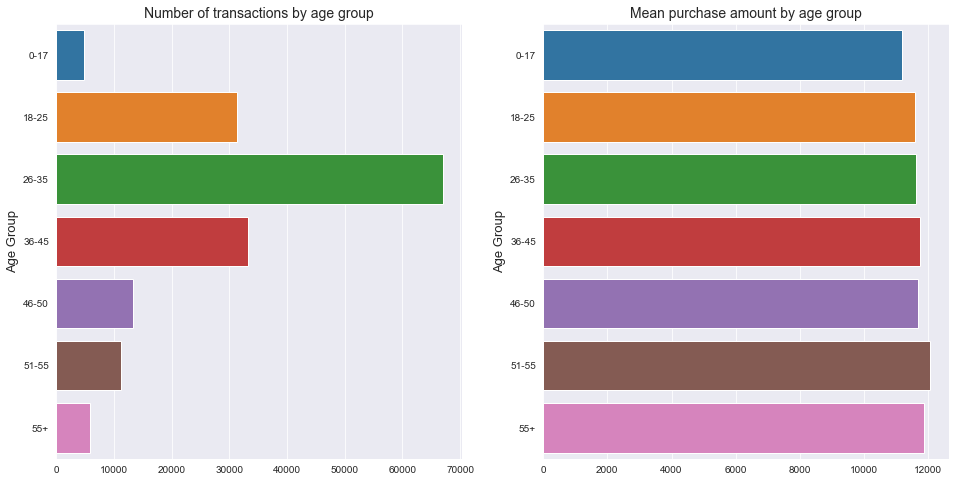

In [90]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(y='Age', data=data, order=sorted(data.Age.unique()))
plt.title('Number of transactions by age group', size=14)
plt.xlabel("")
plt.ylabel('Age Group', size=13)

plt.subplot(122)
age_groupby = data[['Age', 'Purchase']].groupby('Age', as_index=False).agg('mean')
sns.barplot(y='Age', x='Purchase', data=age_groupby, order=sorted(data.Age.unique()))
plt.title('Mean purchase amount by age group', size=14)
plt.xlabel("")
plt.ylabel('Age Group', size=13)
plt.show()

## Displaying top five frequently purchased products by age groups

In [91]:
color_mapping = {}
def color(val):    
    if val in color_mapping.keys():
        color = color_mapping[val]
    else:
        r = lambda: random.randint(0,255)
        color = 'rgba({},{},{},0.2)'.format(r(),r(),r())
        color_mapping[val] = color
    return 'background-color: %s' % color

In [92]:
age_product_groupby = data[['Age', 'Product_ID', 'Purchase']].groupby(['Age', 'Product_ID']).agg('count').rename(columns={'Purchase': 'count'})
age_product_groupby.sort_values('count', inplace=True, ascending=False)
age = sorted(data.Age.unique())
result = pd.DataFrame({x: list(age_product_groupby.loc[x].index)[:5] for x in age}, index=['{})'.format(x) for x in range(1,6)])
display(result.style.applymap(color))

,0-17,18-25,26-35,36-45,46-50,51-55,55+
1),P00145042,P00112142,P00110742,P00025442,P00046742,P00025442,P00080342
2),P00112142,P00110742,P00025442,P00110742,P00025442,P00110742,P00025442
3),P00034742,P00237542,P00112142,P00112142,P00184942,P00059442,P00184942
4),P00242742,P00046742,P00057642,P00057642,P00059442,P00010742,P00059442
5),P00000142,P00242742,P00184942,P00059442,P00102642,P00080342,P00010742


## Displaying top five frequently purchased products by occupation

In [93]:
occupation_product_groupby = data[['Occupation', 'Product_ID', 'Purchase']].groupby(['Occupation', 'Product_ID']).agg('count').rename(columns={'Purchase': 'count'})
occupation_product_groupby.sort_values('count', inplace=True, ascending=False)
result = pd.DataFrame({x: list(occupation_product_groupby.loc[x].index)[:5] for x in range(21)}, index=['{})'.format(x) for x in range(1,6)])
display(result.style.applymap(color))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1),P00110742,P00110742,P00025442,P00025442,P00110742,P00114942,P00110742,P00025442,P00112142,P00034742,P00145042,P00025442,P00057642,P00010742,P00184942,P00025442,P00046742,P00057642,P00010742,P00237542,P00059442
2),P00025442,P00025442,P00110842,P00110842,P00112142,P00112542,P00010742,P00110742,P00242742,P00000142,P00112142,P00059442,P00112142,P00080342,P00025442,P00110742,P00025442,P00025442,P00080342,P00059442,P00110742
3),P00057642,P00046742,P00059442,P00110742,P00025442,P00110742,P00112142,P00112142,P00114942,P00102642,P00242742,P00112142,P00025442,P00085242,P00237542,P00112142,P00034742,P00112142,P00057642,P00145042,P00025442
4),P00112142,P00059442,P00102642,P00059442,P00237542,P00057642,P00025442,P00184942,P00127842,P00145042,P00025442,P00148642,P00237542,P00184942,P00110742,P00059442,P00110742,P00110742,P00184942,P00112142,P00110842
5),P00184942,P00112142,P00110742,P00057642,P00184942,P00025442,P00184942,P00046742,P00102642,P00059442,P00237542,P00102642,P00242742,P00086442,P00148642,P00057642,P00145042,P00237542,P00046742,P00025442,P00148642


## Pie charts displaying number of transactions and sum of purchase amounts by gender

In [94]:
gender_groupby = data[['Gender', 'Purchase']].groupby('Gender').agg(['count', 'sum'])
parameters = {'labels': gender_groupby.index.map({'M': 'Male', 'F': 'Female'}),'autopct': '%1.2f%%','startangle': -30,'textprops': {'fontsize': 14},'explode': (0.05, 0),'shadow': True}

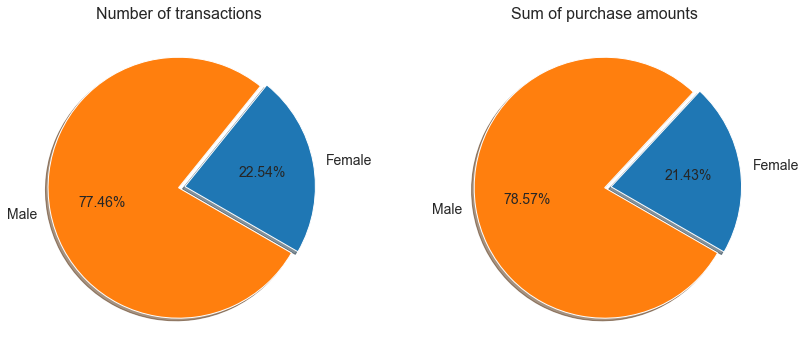

In [95]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.pie(gender_groupby['Purchase']['count'],**parameters)
plt.title('Number of transactions', size=16)
plt.subplot(122)
plt.pie(gender_groupby['Purchase']['sum'],**parameters)
plt.title('Sum of purchase amounts', size=16)
plt.show()

## Bar plots for mean purchase amount by gender

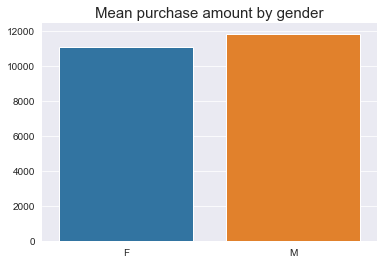

In [96]:
gender_grouped = data[['Gender', 'Purchase']].groupby('Gender', as_index=False).agg('mean')
sns.barplot(x='Gender', y='Purchase', data=gender_grouped)
plt.ylabel("")
plt.xlabel("")
for x in plt.gca().spines.values():
    x.set_visible(False)
plt.title('Mean purchase amount by gender', size=15)
plt.show()

## Bar plot for number of transactions by city color coded by stay in current city and number of transactions by stay in crrent city years

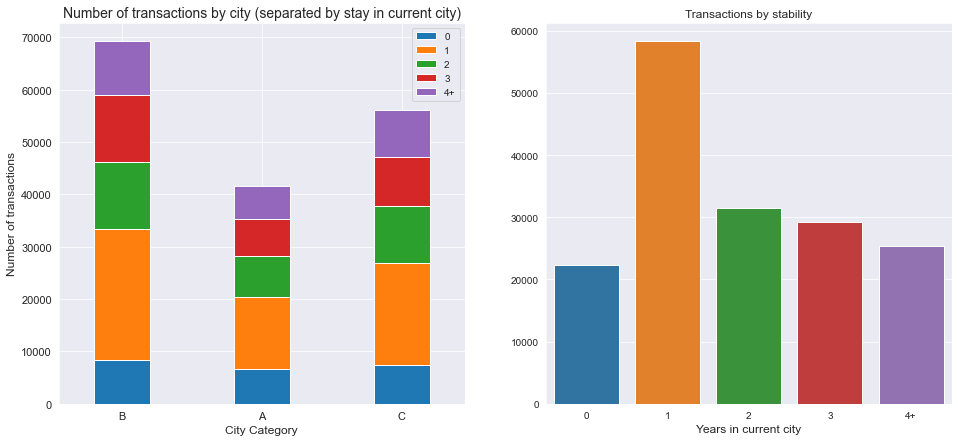

In [97]:
stay_years = [data[data.Stay_In_Current_City_Years == s]['City_Category'].value_counts(sort=False).iloc[::-1] for s in sorted(data.Stay_In_Current_City_Years.unique())]

f, (axis1, axis2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 1]})

years = sorted(data.Stay_In_Current_City_Years.unique())
pd.DataFrame(stay_years, index=years).T.plot.bar(stacked=True, width=0.4, ax=axis1,  rot=0, fontsize=11)
axis1.set_xlabel('City Category', size=12)
axis1.set_ylabel('Number of transactions', size=12)
axis1.set_title('Number of transactions by city (separated by stay in current city)', size=14)

sns.countplot(x='Stay_In_Current_City_Years', data=data, ax=axis2, order=years)
axis2.set_title('Transactions by stability', size=12)
axis2.set_ylabel("")
axis2.set_xlabel('Years in current city', size=12)

plt.gcf().set_size_inches(16, 7)
plt.show()

## Stacked bar plot of count of different occupations color coded by gender

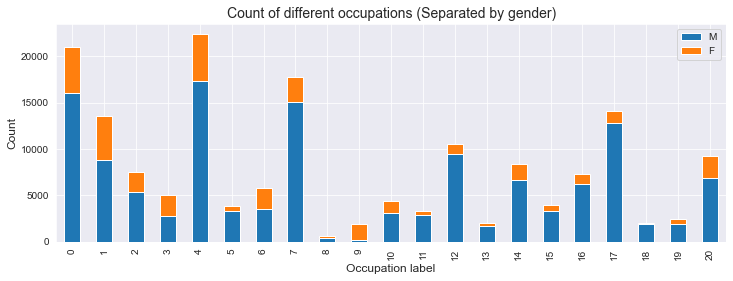

In [98]:
males = data[data.Gender == 'M']['Occupation'].value_counts(sort=False)
females = data[data.Gender == 'F']['Occupation'].value_counts(sort=False)
pd.DataFrame({'M': males, 'F': females}, index=range(0,21)).plot.bar(stacked=True)
plt.gcf().set_size_inches(12, 4)
plt.title("Count of different occupations (Separated by gender)", size=14)
plt.legend(loc="upper right")
plt.xlabel('Occupation label', size=12)
plt.ylabel('Count', size=12)
plt.show()

## Marital status pie chart 

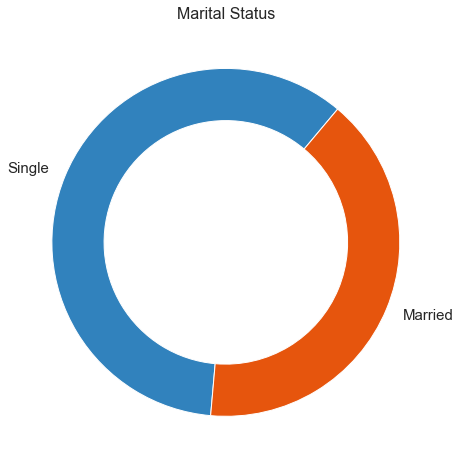

In [99]:
values = data.Marital_Status.value_counts()
fig, axis = plt.subplots(figsize=(8,8))

size = 0.3
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(2)*4)

axis.pie(values, radius=1, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Single', 'Married'],
       textprops={'fontsize': 15}, startangle=50)

ax.set(aspect="equal")
plt.title('Marital Status', fontsize=16)
plt.show()

## Tables displaying top ten products, categories, users based on purchase amount

In [100]:
column_names = ['Product_ID', 'Product_Category_1', 'User_ID']
rename = ['Product', 'Category', 'User']
results = []
for column_name, new_name in zip(column_names, rename):
    group = data[[column_name, 'Purchase']].groupby(column_name, as_index=False).agg('count')
    result = group.sort_values('Purchase', ascending=False)[:10]
    result.index = ['{})'.format(x) for x in range(1,11)]
    results.append(result.rename(columns={column_name: new_name}))

In [101]:
def side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline; padding-right: 3em !important;"'),raw=True)
side_by_side(*results)

,Product,Purchase
1),P00025442,1615
2),P00110742,1612
3),P00112142,1562
4),P00057642,1470
5),P00184942,1440
6),P00046742,1438
7),P00059442,1406
8),P00145042,1406
9),P00237542,1394
10),P00010742,1350
